In [ ]:
from tsai.basics import *

In [ ]:
X, y, splits = get_regression_data('AppliancesEnergy', split_data=False)
tfms = [None, TSRegression()]
batch_tfms = TSStandardize(by_sample=True)
reg = TSRegressor(X, y, splits=splits, path='models', arch="TSTPlus", tfms=tfms, batch_tfms=batch_tfms, metrics=rmse, cbs=ShowGraph(), verbose=True)
reg.fit_one_cycle(100, 3e-4)
reg.export("reg.pkl")

In [45]:
from tsai.inference import load_learner

reg = load_learner("models/reg.pkl")
raw_preds, target, preds = reg.get_X_preds(X[splits[1]], y[splits[1]])

分析数据

In [46]:
X, y, splits = get_regression_data('AppliancesEnergy', split_data=False)

In [47]:
print("X shape:", X.shape)
print("X type:", type(X))
print("y shape:", y.shape)
print("y type:", type(y))

X shape: (137, 24, 144)
X type: <class 'numpy.memmap'>
y shape: (137,)
y type: <class 'numpy.memmap'>


In [48]:
import numpy as np

print("X mean:", np.mean(X))
print("X median:", np.median(X))
print("X std:", np.std(X))

print("y mean:", np.mean(y))
print("y median:", np.median(y))
print("y std:", np.std(y))

X mean: 60.31787899275765
X median: 24.79
X std: 146.25718529993495
y mean: 14.062043795620438
y median: 13.21
y std: 4.0509644050794416


In [49]:
print("First 5 rows of X:")
print(X[:5])
print("First 5 rows of y:")
print(y[:5])

First 5 rows of X:
[[[ 2.12900000e+01  2.12900000e+01  2.12900000e+01 ...  2.17900000e+01
    2.17900000e+01  2.17900000e+01]
  [ 3.16666667e+01  3.19266667e+01  3.20600000e+01 ...  3.36600000e+01
    3.37000000e+01  3.35666667e+01]
  [ 1.98900000e+01  1.98233333e+01  1.97900000e+01 ...  1.97900000e+01
    1.97900000e+01  1.97900000e+01]
  ...
  [ 7.00000000e+00  6.83333333e+00  6.66666667e+00 ...  5.00000000e+00
    5.00000000e+00  5.00000000e+00]
  [ 4.00000000e+01  4.00000000e+01  4.00000000e+01 ...  4.00000000e+01
    4.00000000e+01  4.00000000e+01]
  [-4.20000000e+00 -4.16666667e+00 -4.13333333e+00 ... -4.30000000e+00
   -4.16666667e+00 -4.03333333e+00]]

 [[ 2.16000000e+01  2.17000000e+01  2.16571429e+01 ...  2.08900000e+01
    2.08900000e+01  2.09214286e+01]
  [ 3.91100000e+01  3.92833333e+01  4.08128571e+01 ...  3.87642857e+01
    3.87900000e+01  3.88842857e+01]
  [ 2.00000000e+01  2.00000000e+01  2.00714286e+01 ...  1.96000000e+01
    1.96000000e+01  1.96500000e+01]
  ...
  [ 

In [50]:
print("Number of missing values in X:", np.isnan(X).sum())
print("Number of missing values in y:", np.isnan(y).sum())

Number of missing values in X: 0
Number of missing values in y: 0


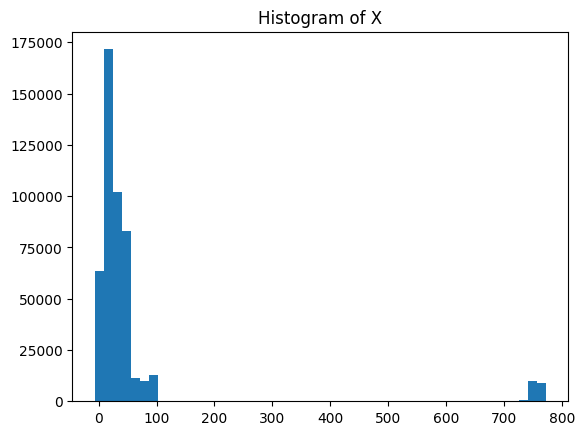

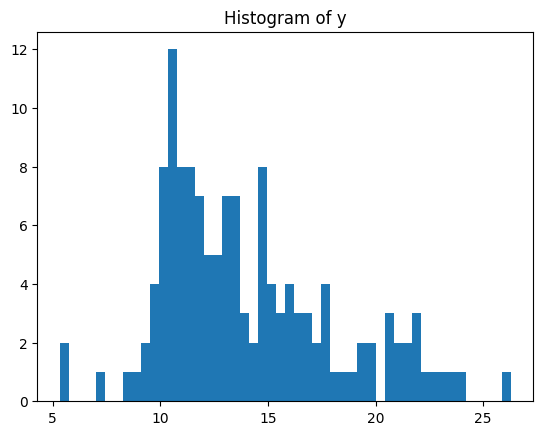

In [51]:
import matplotlib.pyplot as plt

# Histogram of X
plt.hist(X.flatten(), bins=50)
plt.title('Histogram of X')
plt.show()

# Histogram of y
plt.hist(y, bins=50)
plt.title('Histogram of y')
plt.show()